In [47]:
import transform as tsf
import resample as rs
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from matplotlib import pyplot as plt
import metrics as mt

## Importando os dados do csv


In [32]:
data = pd.read_csv("winequality-red.csv",delimiter=';')

In [33]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [114]:
data.shape

(1599, 12)

In [35]:
dados = data.values

In [36]:
dados

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [37]:
X = dados[:,:11]
y = dados[:,11]

In [38]:
numero_linhas = data.shape[0]

In [39]:
numero_linhas

1599

## Questão 2

In [40]:
idx_train, idx_test = rs.slit_k_fold(numero_linhas,5,True,0)

In [41]:
sgd = linear_model.SGDRegressor()

In [42]:
linearRegression = linear_model.LinearRegression()

In [43]:
linearSVR = svm.LinearSVR()

In [76]:
svr = svm.SVR()

In [45]:
randomForest = ensemble.RandomForestRegressor()

In [46]:
gradientBoosting = ensemble.GradientBoostingRegressor()

## SGD - Stochastic Gradient Descent Regressor

In [58]:
total = 0.0
for i in range(5):
    sgd.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = sgd.predict(X[idx_test[i]])
    total = total + mt.mse(y[idx_test[i]],y_pred)

/media/iarlenaquiles/62218969-dad8-4941-b001-1789e1c96d62/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [59]:
total = total / 5

In [60]:
total

2.935512887562424e+25

## Linear Regression 

In [61]:
linear = 0.0
for i in range(5):
    linearRegression.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = linearRegression.predict(X[idx_test[i]])
    linear = linear + mt.mse(y[idx_test[i]],y_pred)

In [62]:
linear = linear / 5

In [63]:
linear

0.43754831857926213

## Linear SVR

In [64]:
linearsvr = 0.0
for i in range(5):
    linearSVR.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = linearSVR.predict(X[idx_test[i]])
    linearsvr = linearsvr + mt.mse(y[idx_test[i]],y_pred)

In [65]:
linearsvr = linearsvr / 5

In [66]:
linearsvr

1.2304662618198363

## SVR - Epsilon-Support Vector Regression

In [77]:
total_svr = 0.0
for i in range(5):
    svr.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = svr.predict(X[idx_test[i]])
    total_svr = total_svr + mt.mse(y[idx_test[i]],y_pred)

In [78]:
total_svr = total_svr / 5

In [79]:
total_svr

0.5776669864507811

## Random Forest Regressor

In [80]:
random = 0.0
for i in range(5):
    randomForest.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = randomForest.predict(X[idx_test[i]])
    random = random + mt.mse(y[idx_test[i]],y_pred)

In [81]:
random = random / 5

In [83]:
random

0.448021778489054

## Gradient Boosting Regressor

In [84]:
gradient = 0.0
for i in range(5):
    gradientBoosting.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = gradientBoosting.predict(X[idx_test[i]])
    gradient = gradient + mt.mse(y[idx_test[i]],y_pred)

In [85]:
gradient = gradient / 5

In [86]:
gradient

0.4468111245860914

## Questão 3

In [103]:
labels = ['SGD','Linear Regression','Linear SVR','SVR','Random Forest','Gradient Boosting']

In [104]:
classes = [total, linear, linearsvr, total_svr, random, gradient]

In [105]:
for i in range(0,len(labels)):
    print(labels[i] + ': ' + str(classes[i]))

SGD: 2.935512887562424e+25
Linear Regression: 0.43754831857926213
Linear SVR: 1.2304662618198363
SVR: 0.5776669864507811
Random Forest: 0.448021778489054
Gradient Boosting: 0.4468111245860914


([<matplotlib.axis.XTick at 0x7f5da504f940>,
 <a list of 6 Text xticklabel objects>)

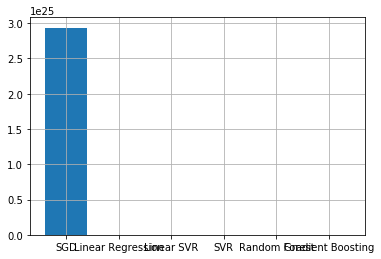

In [106]:
plt.grid()
plt.bar(range(len(labels)),classes)
plt.xticks(range(len(labels)), labels)

In [107]:
labels_ = ['Linear Regression','Linear SVR','SVR','Random Forest','Gradient Boosting']
classes_ = [linear, linearsvr, total_svr, random, gradient]

In [108]:
for i in range(0,len(labels_)):
    print(labels_[i] + ': ' + str(classes_[i]))

Linear Regression: 0.43754831857926213
Linear SVR: 1.2304662618198363
SVR: 0.5776669864507811
Random Forest: 0.448021778489054
Gradient Boosting: 0.4468111245860914


([<matplotlib.axis.XTick at 0x7f5dada9ef28>,
 <a list of 5 Text xticklabel objects>)

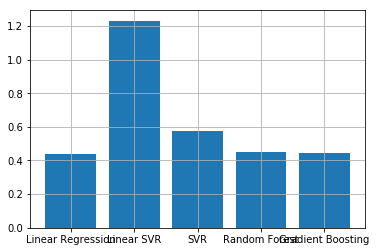

In [109]:
plt.grid()
plt.bar(range(len(labels_)),classes_)
plt.xticks(range(len(labels_)), labels_)

## Questão 4

In [110]:
final = ensemble.GradientBoostingRegressor()

In [111]:
final.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [112]:
y_pred = final.predict(X)

In [113]:
mt.mse(y, y_pred)

0.2543811465531937

## Questão 5

### Stochastic Gradient Descent 

É uma aproximação estocástica da otimização de descida de gradiente e método iterativo para minimizar uma função objetiva que é escrita como uma soma de funções diferenciáveis . Em outras palavras, o SGD tenta encontrar mínimos ou máximos por iteração.

### Gradient Descent

é um algoritmo de otimização iterativa de primeira ordem para encontrar o mínimo de uma função. Para encontrar um mínimo local de uma função usando gradiente descendente, toma-se medidas proporcionais ao negativo do gradiente (ou do gradiente aproximado) da função no ponto atual. Se, em vez disso, forem dados passos proporcionais ao positivo do gradiente, um deles se aproxima de um máximo local dessa função; o procedimento é então conhecido como subida de gradiente .

